<a href="https://colab.research.google.com/github/lazeicoder/Spam-and-smishing-detection-/blob/master/LinearSVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix
)
from scipy.sparse import hstack


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("Dataset_10191.csv")


In [4]:
label_encoder = LabelEncoder()
df["label_enc"] = label_encoder.fit_transform(df["LABEL"])

label_mapping = dict(zip(
    label_encoder.classes_,
    label_encoder.transform(label_encoder.classes_)
))

print("Label Mapping:", label_mapping)


Label Mapping: {'ham': np.int64(0), 'smishing': np.int64(1), 'spam': np.int64(2)}


In [5]:
tfidf = TfidfVectorizer(
    ngram_range=(1, 2),
    max_features=25000,
    stop_words="english",
    sublinear_tf=True
)

X_text = tfidf.fit_transform(df["TEXT"])


In [6]:
X_meta = (
    df[["URL", "EMAIL", "PHONE"]]
    .replace({"Yes": 1, "No": 0})
    .astype(int)
    .values
)


/tmp/ipython-input-4199362701.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  .replace({"Yes": 1, "No": 0})


In [7]:
X = hstack([X_text, X_meta])
y = df["label_enc"]


In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    stratify=y,
    random_state=42
)


In [9]:
svm_model = LinearSVC(
    C=1.0,
    class_weight="balanced",
    max_iter=5000,
    random_state=42
)


In [10]:
svm_model.fit(X_train, y_train)


LinearSVC(class_weight='balanced', max_iter=5000, random_state=42)

In [11]:
y_pred = svm_model.predict(X_test)


In [12]:
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)

print("\nClassification Report:")
print(classification_report(
    y_test,
    y_pred,
    target_names=label_encoder.classes_,
    digits=4
))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.9803825404610103

Classification Report:
              precision    recall  f1-score   support

         ham     0.9971    0.9985    0.9978       679
    smishing     0.9805    0.9632    0.9718       680
        spam     0.9638    0.9794    0.9716       680

    accuracy                         0.9804      2039
   macro avg     0.9805    0.9804    0.9804      2039
weighted avg     0.9805    0.9804    0.9804      2039


Confusion Matrix:
[[678   1   0]
 [  0 655  25]
 [  2  12 666]]


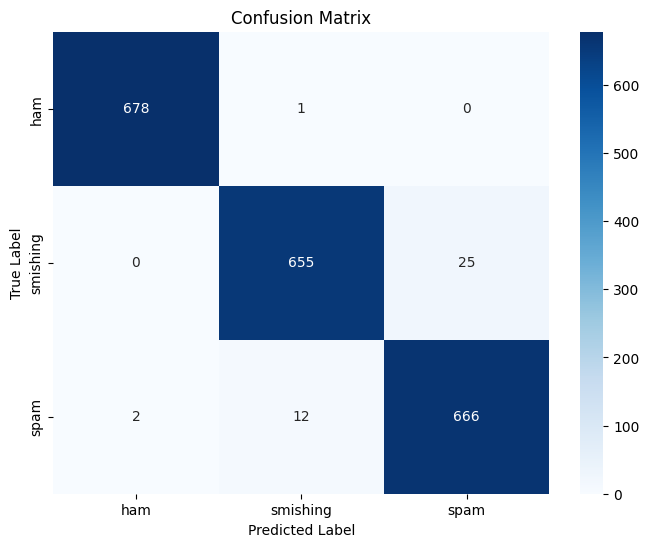

In [13]:
plt.figure(figsize=(8, 6))
sns.heatmap(
    confusion_matrix(y_test, y_pred),
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=label_encoder.classes_,
    yticklabels=label_encoder.classes_
)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()